# Parameters

In [410]:
# Robotermaße
robot_width = 3
robot_length = 5

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (10, 16, 1)
current_position=start_point

# Define Occupancy Grid

In [411]:
import numpy as np

def add_obstacle(occupancy_grid, width, length, x, y):
    width_occ_grid = len(occupancy_grid[0])
    height_occ_grid = len(occupancy_grid)

    start_row = y
    end_row = min(height_occ_grid, y + length)
    start_col = x
    end_col = min(width_occ_grid, x + width)

    for row in range(start_row, end_row):
        for col in range(start_col, end_col):
            occupancy_grid[row][col] = False

    return occupancy_grid

def generate_empty_occupancy_grid(size):
    empty_occupancy_grid = np.ones((size, size), dtype=bool)

    return empty_occupancy_grid

In [412]:
# Obstacles
occupancy_grid = generate_empty_occupancy_grid(18)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=11,
    x=3,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=3,
    y=15)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=0,
    x=7,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=13,
    x=9,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=9,
    x=9,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=5,
    length=1,
    x=9,
    y=12)

# Plot Occupancy Grid

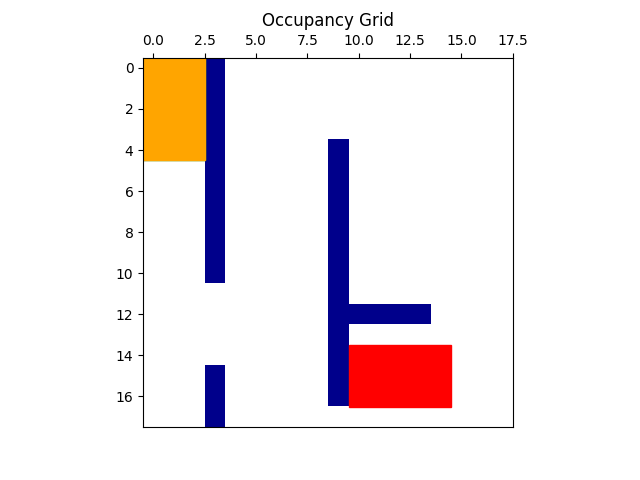

In [413]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_occupancy_grid(occupancy_grid, goal_point, plot_axis, current_position=None, path=[], robot_width=None, robot_length=None, active=True, plot_title="Occupancy Grid", y_axis_label=None, start_point=None):
    plot_axis.clear()

    if active:
        cmap = ListedColormap(['darkblue', 'white'])        
        start_color = 'green'
        goal_color = 'red'
        path_color = 'blue'
        current_color = 'orange'
    else:
        cmap = 'gray'
        start_color = 'black'
        goal_color = 'dimgray'
        path_color = 'darkgray'
        current_color = 'gray'
        line_color = 'black'

    plot_axis.imshow(occupancy_grid, cmap=cmap, interpolation='nearest', origin='upper')

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[start_y, start_x]:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='x', label='Start Position')
            else:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='o', label='Start Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            current_rect = plt.Rectangle(
                (start_x - 0.5, start_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(start_x, start_y),
                angle=start_rotation * -90,  # Rotation in Grad umrechnen
                color=start_color,
                label='Start Position'
            )
            plot_axis.add_patch(current_rect)


    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[goal_y, goal_x]:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='x', label='Goal Position')
            else:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='o', label='Goal Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            current_rect = plt.Rectangle(
                (goal_x - 0.5, goal_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(goal_x, goal_y),
                angle=goal_rotation * -90,  # Rotation in Grad umrechnen
                color=goal_color,
                label='Start Position'
            )
            plot_axis.add_patch(current_rect)

    plot_axis.plot([p[0] for p in path], [p[1] for p in path], color=path_color, label='Chosen Path')

    if current_position is not None:
        current_x, current_y, current_rotation = current_position
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[current_y, current_x]:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='x', label='Current Position')
            else:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='o', label='Current Position')
                # Darstellung des aktuellen Roboters als Rechteck
        else:
            current_rect = plt.Rectangle(
                (current_x - 0.5, current_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(current_x, current_y),
                angle=current_rotation * -90,  # Rotation in Grad umrechnen
                color=current_color,
                label='Current Position'
            )
            plot_axis.add_patch(current_rect)

    plot_axis.grid(False)
    plot_axis.set_title(plot_title)

    # Beschriftung der X-Achse oben
    plot_axis.xaxis.tick_top()

    if y_axis_label is not None:
        # Optionale Beschriftung Y-Achse
        plot_axis.text(-0.15, 0.5, y_axis_label, rotation='horizontal', va='center', ha='right', transform=plot_axis.transAxes)


fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    start_point=start_point)
plt.show()

# Compute Computational Spaces

In [414]:
def compute_cs_0deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - (robot_length - 1))
                end_row = min(height, row + 1)
                start_col = max(0, col - (robot_width - 1))
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle Zeilen bis height-robot_length auf False setzen
    for row in range(height - robot_length + 1, height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle Spalten bis width-robot_width auf False setzen
    for col in range(width - robot_width + 1, width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_90deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_width)
                start_col = max(0, col - robot_length + 1)
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_width-1) Zeilen auf False setzen
    for row in range(robot_width - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle rechten (robot_length-1) Spalten auf False setzen
    for col in range((width - robot_length + 1), width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_180deg(occupancy_grid, robot_width, robot_length):
    width = len(occupancy_grid[0])
    height = len(occupancy_grid)

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_length)
                start_col = col
                end_col = min(width, col + robot_width)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_length-1) Zeilen auf False setzen
    for row in range(robot_length - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_width-1) Spalten auf False setzen
    for col in range(robot_width - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space



def compute_cs_270deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - robot_width + 1)
                end_row = min(height, row + 1)
                start_col = col
                end_col = min(width, col + robot_length)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle unteren (robot_width-1) Zeilen auf False setzen
    for row in range((height - robot_width + 1), height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_length-1) Spalten auf False setzen
    for col in range(robot_length - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space

In [415]:
computational_space_list = []
computational_space_list.append(compute_cs_0deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_90deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_180deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_270deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space = np.array(computational_space_list)

# Plot Computational Spaces

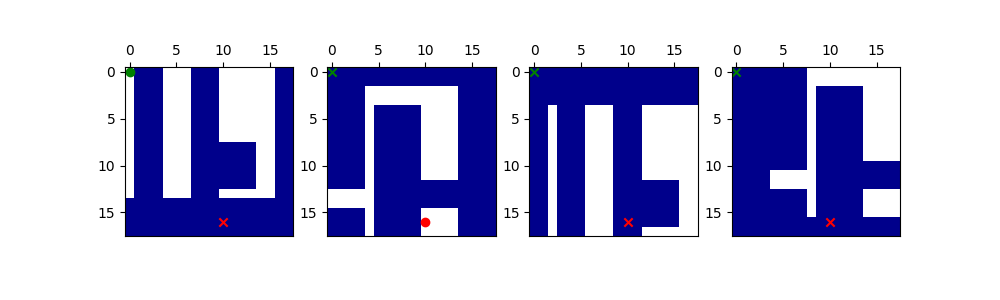

In [416]:
%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 3))
for rotation in range(4):      
    ax_occupancy_grid = fig.add_subplot(1, 4, rotation+1)
    plot_occupancy_grid(
        occupancy_grid=computational_space[rotation], 
        goal_point=goal_point, 
        plot_axis=ax_occupancy_grid, 
        start_point=start_point,
        plot_title="")
    
plt.show()


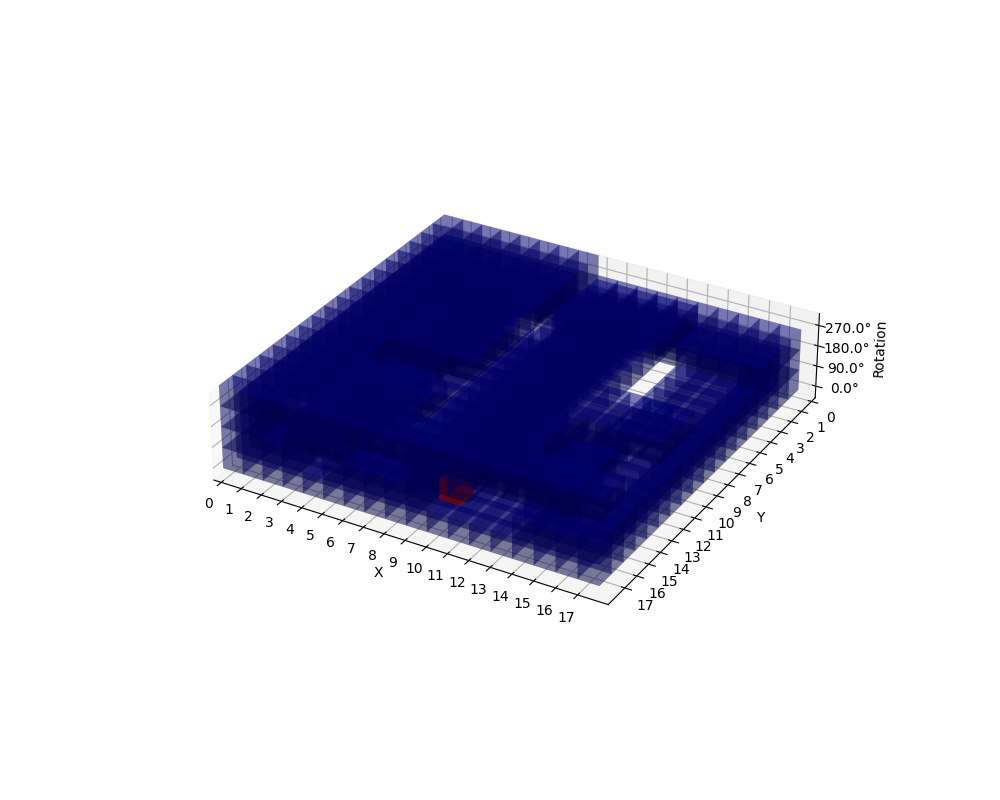

In [418]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_computational_space(computational_space, ax, force_field_x=None, force_field_y=None, force_field_rotation=None, start_point=None, goal_point=None, current_position=None):
    ax.clear()
    rotation, size_y, size_x = computational_space.shape

    obstacle_color = 'darkblue'
    start_color = 'green'
    goal_color = 'red'
    current_color = 'orange'
    
    if force_field_x is not None and force_field_y is not None and force_field_rotation is not None:
        max_force = np.max(np.sqrt(force_field_x**2 + force_field_y**2 + force_field_rotation**2))

    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                if not computational_space[r, y, x]:
                    # Plotte einen Würfel mit gleichen Abmessungen in allen Richtungen
                    ax.bar3d(x - 0.5, y - 0.5, r, 1, 1, 1, color=obstacle_color, alpha=0.3)
                else:
                    if force_field_x is not None and force_field_y is not None and force_field_rotation is not None:
                        # Berechne die Länge des Kraftvektors für diesen Punkt
                        force_length = np.sqrt(force_field_x[r, y, x]**2 + force_field_y[r, y, x]**2 + force_field_rotation[r, y, x]**2)
                        # Normalisiere den Kraftvektor auf den Bereich [0, 1]
                        length = force_length / max_force if max_force != 0 else 0
                        ax.quiver(x, y, r + 0.5, force_field_x[r, y, x], force_field_y[r, y, x], force_field_rotation[r, y, x], color='blue', length=length, normalize=True)

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        # Plotte einen Würfel für den Startpunkt
        ax.bar3d(start_x - 0.5, start_y - 0.5, start_rotation, 1, 1, 1, color=start_color, alpha=0.5)

    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        # Plotte einen Würfel für den Zielpunkt
        ax.bar3d(goal_x - 0.5, goal_y - 0.5, goal_rotation, 1, 1, 1, color=goal_color, alpha=0.5)

    if current_position is not None:
        current_x, current_y, current_rotation = current_position
        # Plotte einen Würfel für die aktuelle Position
        ax.bar3d(current_x - 0.5, current_y - 0.5, current_rotation, 1, 1, 1, color=current_color, alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')

    # Invertiere die Y-Achse
    ax.invert_yaxis()

    # Passe die Skalierung der Z-Achse manuell an
    ax.set_xlim(0, size_x)
    ax.set_ylim(0, size_y)
    ax.set_zlim(0, rotation)

    # Passe die Z-Koordinaten an, um die Würfel über der XY-Ebene zu positionieren
    ax.set_box_aspect([size_x / rotation, size_y / rotation, 1])

    # Passe die Position der Z-Ticks an
    ax.set_zticks(np.arange(0, rotation, 1) + 0.5)
    ax.set_zticklabels([f'{angle}°' for angle in np.arange(0, 360, 360/rotation)])

    # Passe die Position der X- und Y-Ticks an
    ax.set_xticks(np.arange(0, size_x, 1))
    ax.set_yticks(np.arange(0, size_y, 1))
    ax.invert_yaxis()


fig = plt.figure(figsize=(10, 8))
plot_axis = fig.add_subplot(111, projection='3d')
visualize_computational_space(
    computational_space=computational_space, 
    goal_point=goal_point,
    start_point=start_point,
    ax=plot_axis)
plt.show()

# Compute Wavefront Potentials

In [419]:
def wavefront_algorithm(cs_space, goal):
    rotation_size, size_y, size_x = cs_space.shape
    goal_x, goal_y, goal_rotation = goal

    total_potential = np.zeros_like(cs_space, dtype=float)  # initialize with 0s
    queue = [(goal_x, goal_y, goal_rotation, 2)]  # start with the goal
    visited = set([(goal_x, goal_y, goal_rotation)])

    while queue:
        current_x, current_y, current_rotation, current_potential = queue.pop(0)

        total_potential[current_rotation, current_y, current_x] = current_potential

        # Check neighbours in xy-boundary + not an obstacle + not visited
        for dr, dy, dx in [(0, -1, 0), (0, 1, 0), (0, 0, 1), (0, 0, -1), (-1, 0, 0), (1, 0, 0)]:
            next_rotation = (current_rotation + dr) % rotation_size
            next_y, next_x = current_y + dy, current_x + dx

            if 0 <= next_y < size_y and 0 <= next_x < size_x and \
               cs_space[next_rotation, next_y, next_x] and \
               total_potential[next_rotation, next_y, next_x] == 0 and \
               (next_x, next_y, next_rotation) not in visited:
                queue.append((next_x, next_y, next_rotation, current_potential + 1))
                visited.add((next_x, next_y, next_rotation))

    return total_potential


# Plot Wavefront Potential

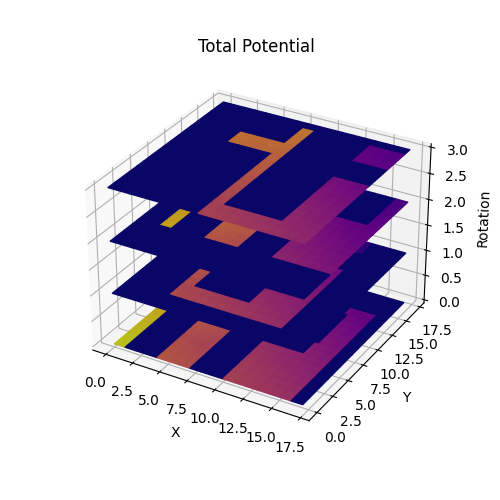

'\noccupancy_grid = add_obstacle(\n    occupancy_grid=occupancy_grid,\n    width=3,\n    length=1,\n    x=2,\n    y=3)\noccupancy_grid = add_obstacle(\n    occupancy_grid=occupancy_grid,\n    width=1,\n    length=3,\n    x=7,\n    y=7)\n'

In [420]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_potential(potential, title, ax):
    rotation, size_y, size_x = potential.shape

    # Erzeuge ein Gitter im 3D-Raum
    x = np.arange(size_x)
    y = np.arange(size_y)
    X, Y = np.meshgrid(x, y)

    # Plotte die 3D-imshow für jede Rotationsebene
    for r in range(rotation):
        Z = np.full_like(X, r)  # Z-Koordinate auf Höhe der Rotationsebene
        ax.plot_surface(X, Y, Z, facecolors=plt.cm.plasma(potential[r, :, :]), rstride=1, cstride=1, alpha=1, antialiased=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')
    ax.set_title(title)
    #ax.invert_yaxis()

fig = plt.figure(figsize=(5, 5))
total_potential = wavefront_algorithm(
    cs_space=computational_space,
    goal=goal_point
)
visualize_3d_potential(total_potential/np.max(total_potential), 'Total Potential', fig.add_subplot(111, projection='3d'))
plt.show()

'''
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=1,
    x=2,
    y=3)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=7,
    y=7)
'''

# Compute Force Field

In [446]:
def compute_gradients4(total_potential, goal_point):

    obstacles = np.isnan(total_potential)

    # Kopiere die erste und letzte Ebene
    first_layer = total_potential[0, :, :]
    last_layer = total_potential[-1, :, :]

    # Füge die kopierten Ebenen oben und unten an
    total_potential_z_padded = np.concatenate([last_layer[np.newaxis, :, :], total_potential, first_layer[np.newaxis, :, :]], axis=0)

    # Berechne die Gradienten unter Berücksichtigung der erweiterten Ebenen
    gradient_z, gradient_y, gradient_x = np.gradient(total_potential_z_padded)

    # Die negierten Gradienten repräsentieren die Kräfte
    force_field_x = -gradient_x[1:-1, :, :]
    force_field_y = -gradient_y[1:-1, :, :]
    force_field_rotation = -gradient_z[1:-1, :, :]

    # Setze Gradienten für Hindernisse auf 0
    force_field_x[obstacles] = 0
    force_field_y[obstacles] = 0
    force_field_rotation[obstacles] = 0
    
    # Ersetze NaN-Gradienten durch manuell berechneten Gradienten
    print("nan force_field_x before:")
    print(np.argwhere(np.isnan(force_field_x)))
    nan_coordinates_x = np.argwhere(np.isnan(force_field_x))
    for z, y, x in nan_coordinates_x:
        if x-1 >= 0 and np.isnan(total_potential[z, y, x-1]) and x+1 < total_potential.shape[2] and not np.isnan(total_potential[z, y, x+1]):
            # x is at "left border"
            gradient_manual_x = total_potential[z, y, x+1] - total_potential[z, y, x]
            force_field_x[z, y, x] = -gradient_manual_x if gradient_manual_x <= 0 else 0
        elif x+1 < total_potential.shape[2] and np.isnan(total_potential[z, y, x+1]) and x-1 >= 0 and not np.isnan(total_potential[z, y, x-1]):
            # x is at "right border"
            gradient_manual_x = total_potential[z, y, x] - total_potential[z, y, x-1]
            force_field_x[z, y, x] = -gradient_manual_x if gradient_manual_x >= 0 else 0
        else:
            force_field_x[z, y, x] = 0
    print("nan force_field_x after:")
    print(np.argwhere(np.isnan(force_field_x)))

    print("nan force_field_y before:")
    print(np.argwhere(np.isnan(force_field_y)))
    nan_coordinates_y = np.argwhere(np.isnan(force_field_y))
    for z, y, x in nan_coordinates_y:
        if y-1 >= 0 and np.isnan(total_potential[z, y-1, x]) and y+1 < total_potential.shape[1] and not np.isnan(total_potential[z, y+1, x]):
            # y is at "top border"
            gradient_manual_y = total_potential[z, y+1, x] - total_potential[z, y, x]
            force_field_y[z, y, x] = gradient_manual_y if gradient_manual_y <= 0 else 0
        elif y+1 < total_potential.shape[1] and np.isnan(total_potential[z, y+1, x]) and y-1 >= 0 and not np.isnan(total_potential[z, y-1, x]):
            # y is at "bottom border"
            gradient_manual_y = total_potential[z, y, x] - total_potential[z, y-1, x]
            force_field_y[z, y, x] = gradient_manual_y if gradient_manual_y >= 0 else 0
        else:
            force_field_y[z, y, x] = 0
    print("nan force_field_y after:")
    print(np.argwhere(np.isnan(force_field_y)))

    print("nan force_field_rotation before:")
    print(np.argwhere(np.isnan(force_field_rotation))) 
    nan_coordinates_rotation = np.argwhere(np.isnan(force_field_rotation))
    for z, y, x in nan_coordinates_rotation:
        if np.isnan(total_potential[(z+1) % 4, y, x]) and not np.isnan(total_potential[(z-1) % 4, y, x]):
            # z is at "upper border"
            gradient_manual_z = total_potential[z, y, x] - total_potential[(z-1) % 4, y, x] # caution!
            force_field_rotation[z, y, x] = -gradient_manual_z if gradient_manual_z >= 0 else 0  # caution!
        elif np.isnan(total_potential[(z-1) % 4, y, x]) and not np.isnan(total_potential[(z+1) % 4, y, x]):
            # z is at "lower border"
            gradient_manual_z = total_potential[(z+1) % 4, y, x] - total_potential[z, y, x]
            force_field_rotation[z, y, x] = -gradient_manual_z if gradient_manual_z <= 0 else 0
        else:
            force_field_rotation[z, y, x] = 0
    print("nan force_field_rotation after:")
    print(np.argwhere(np.isnan(force_field_rotation))) 

    local_minima_coordinates = np.argwhere((force_field_x == 0) & (force_field_y == 0) & (force_field_rotation == 0) & ~obstacles)
    goal_x, goal_y, goal_rotation = goal_point

    print("0 = 0 = 0 before:")
    print(np.argwhere((force_field_x == 0) & (force_field_y == 0) & (force_field_rotation == 0) & ~obstacles))

    for z, y, x in local_minima_coordinates:
        if x != goal_x or y != goal_y or z != goal_rotation:
            if total_potential[z, y, x-1] == total_potential[z, y, x+1]:
                if total_potential[z, y, x+1] <= total_potential[z, y, x] and \
                    (force_field_y[z, y, x+1] >= 0 or \
                     abs(force_field_x[z, y, x+1]) < abs(force_field_y[z, y, x+1]) and \
                     abs(force_field_x[z, y, x+1]) < abs(force_field_rotation[z, y, x+1])):
                        # So we dont get back
                        gradient_local_min_x = total_potential[z, y, x+1] - total_potential[z, y, x]
                        force_field_x[z, y, x] = -gradient_local_min_x
                elif total_potential[z, y, x-1] <= total_potential[z, y, x] and \
                    (force_field_y[z, y, x-1] <= 0 or \
                     abs(force_field_x[z, y, x-1]) < abs(force_field_y[z, y, x-1]) and \
                     abs(force_field_x[z, y, x-1]) < abs(force_field_rotation[z, y, x-1])):
                        # So we dont get back
                        gradient_local_min_x = total_potential[z, y, x-1] - total_potential[z, y, x]
                        force_field_x[z, y, x] = gradient_local_min_x

            if total_potential[z, y-1, x] == total_potential[z, y+1, x]:
                if total_potential[z, y-1, x] <= total_potential[z, y, x] and \
                    (force_field_y[z, y-1, x] >= 0 or \
                     abs(force_field_y[z, y-1, x])  < abs(force_field_x[z, y-1, x]) and \
                     abs(force_field_y[z, y-1, x]) < abs(force_field_rotation[z, y-1, x])):
                        # So we dont get back
                        gradient_local_min_y = total_potential[z, y-1, x] - total_potential[z, y, x]
                        force_field_x[z, y, x] = gradient_local_min_y
                elif total_potential[z, y+1, x] <= total_potential[z, y, x] and \
                    (force_field_y[z, y+1, x] <= 0 or \
                    abs(force_field_y[z, y+1, x]) < abs(force_field_x[z, y+1, x]) and \
                    abs(force_field_y[z, y+1, x]) < abs(force_field_rotation[z, y+1, x]) and \
                    total_potential[z, y+1, x] < total_potential[z, y, x]):
                        # So we dont get back
                        gradient_local_min_y = total_potential[z, y+1, x] - total_potential[z, y, x]
                        force_field_y[z, y, x] = -gradient_local_min_y

            if total_potential[(z+1) % 4, y, x] == total_potential[(z-1) % 4, y, x]:
                if total_potential[(z+1) % 4, y, x] <= total_potential[z, y, x] and \
                    (force_field_rotation[(z+1) % 4, y, x] >= 0 or \
                     abs(force_field_rotation[(z+1) % 4, y, x]) < abs(force_field_x[(z+1) % 4, y, x]) and \
                     abs(force_field_rotation[(z+1) % 4, y, x]) < abs(force_field_y[(z+1) % 4, y, x])):
                        # So we dont get back
                        gradient_local_min_rotation = total_potential[(z+1) % 4, y, x] - total_potential[z, y, x]
                        force_field_rotation[z, y, x] = -gradient_local_min_rotation
                elif total_potential[(z-1) % 4, y, x] <= total_potential[z, y, x] and \
                    (force_field_rotation[(z-1) % 4, y, x] <= 0 or \
                     abs(force_field_rotation[(z-1) % 4, y, x]) < abs(force_field_x[(z-1) % 4, y, x]) and \
                     abs(force_field_rotation[(z-1) % 4, y, x]) < abs(force_field_y[(z-1) % 4, y, x])):
                        # So we dont get back
                        gradient_local_min_rotation = total_potential[(z-1) % 4, y, x] - total_potential[z, y, x]
                        force_field_rotation[z, y, x] = gradient_local_min_rotation

    print("0 = 0 = 0 after:")
    print(np.argwhere((force_field_x == 0) & (force_field_y == 0) & (force_field_rotation == 0) & ~obstacles))

    return force_field_x, force_field_y, force_field_rotation

total_potential[~computational_space] = np.nan

force_field_x, force_field_y, force_field_rotation = compute_gradients4(total_potential, goal_point)

nan force_field_x before:
[[ 0  0  0]
 [ 0  0  4]
 [ 0  0  6]
 [ 0  0 10]
 [ 0  0 15]
 [ 0  1  0]
 [ 0  1  4]
 [ 0  1  6]
 [ 0  1 10]
 [ 0  1 15]
 [ 0  2  0]
 [ 0  2  4]
 [ 0  2  6]
 [ 0  2 10]
 [ 0  2 15]
 [ 0  3  0]
 [ 0  3  4]
 [ 0  3  6]
 [ 0  3 10]
 [ 0  3 15]
 [ 0  4  0]
 [ 0  4  4]
 [ 0  4  6]
 [ 0  4 10]
 [ 0  4 15]
 [ 0  5  0]
 [ 0  5  4]
 [ 0  5  6]
 [ 0  5 10]
 [ 0  5 15]
 [ 0  6  0]
 [ 0  6  4]
 [ 0  6  6]
 [ 0  6 10]
 [ 0  6 15]
 [ 0  7  0]
 [ 0  7  4]
 [ 0  7  6]
 [ 0  7 10]
 [ 0  7 15]
 [ 0  8  0]
 [ 0  8  4]
 [ 0  8  6]
 [ 0  8 14]
 [ 0  8 15]
 [ 0  9  0]
 [ 0  9  4]
 [ 0  9  6]
 [ 0  9 14]
 [ 0  9 15]
 [ 0 10  0]
 [ 0 10  4]
 [ 0 10  6]
 [ 0 10 14]
 [ 0 10 15]
 [ 0 11  0]
 [ 0 11  4]
 [ 0 11  6]
 [ 0 11 14]
 [ 0 11 15]
 [ 0 12  0]
 [ 0 12  4]
 [ 0 12  6]
 [ 0 12 14]
 [ 0 12 15]
 [ 0 13  0]
 [ 0 13  4]
 [ 0 13  6]
 [ 0 13 10]
 [ 0 13 15]
 [ 1  2  4]
 [ 1  2 13]
 [ 1  3  4]
 [ 1  3 13]
 [ 1  4  4]
 [ 1  4 10]
 [ 1  4 13]
 [ 1  5  4]
 [ 1  5 10]
 [ 1  5 13]
 [ 1  6  4]
 [

In [447]:
print(force_field_y[3,15,17])
print(total_potential[3,14,17], total_potential[3,15,17],total_potential[3,16,17])

0.0
15.0 14.0 nan


In [448]:
total_potential[~computational_space] = 0
force_field_x[~computational_space] = 0
force_field_y[~computational_space] = 0
force_field_rotation[~computational_space] = 0

# Plot Force Vectors

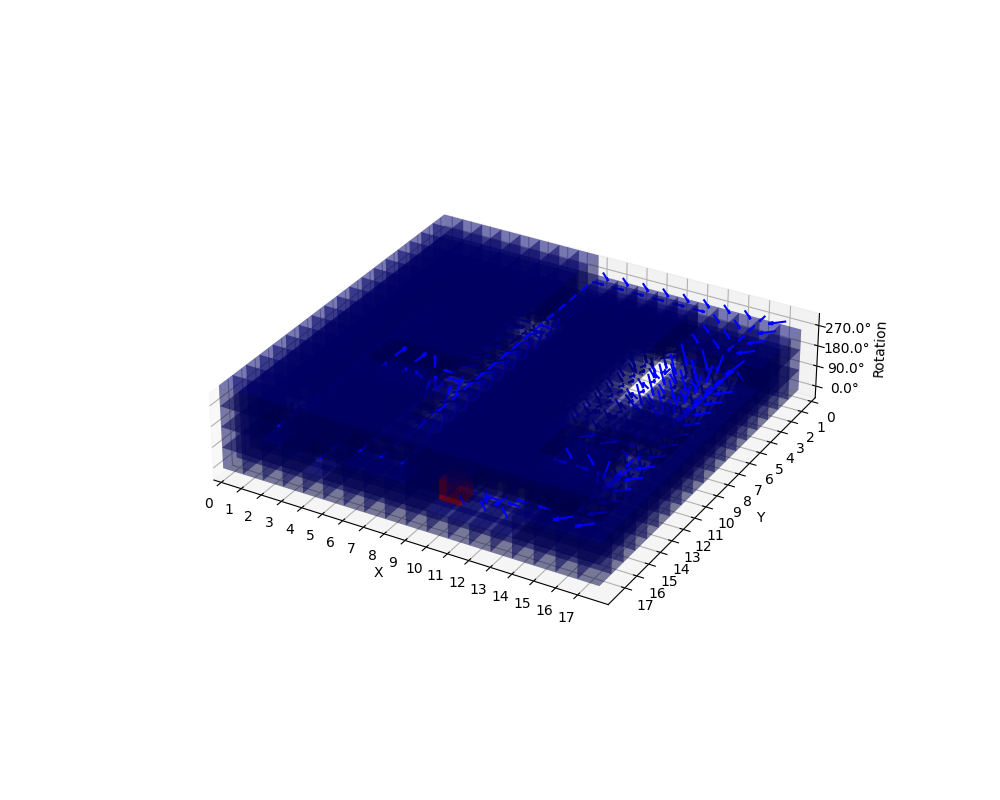

In [449]:
fig = plt.figure(figsize=(10, 8))
plot_axis = fig.add_subplot(111, projection='3d')
visualize_computational_space(
    computational_space=computational_space, 
    force_field_x=force_field_x, 
    force_field_y=force_field_y, 
    force_field_rotation=force_field_rotation, 
    goal_point=goal_point, 
    ax=plot_axis)
plt.show()

# Gradient Descent Step

In [455]:
def gradient_descent(current_position, force_field_x, force_field_y, force_field_rotation, path, goal_point):

    if current_position == goal_point:
        print("DONE!")
        return goal_point

    x, y, rotation = current_position

    force_x = force_field_x[rotation, y, x]
    force_y = force_field_y[rotation, y, x]
    force_rotation = force_field_rotation[rotation, y, x]

    # Füge die aktuelle Position zum Pfad hinzu
    path.append((x, y, rotation))

    possible_moves = []

    if abs(force_x) != 0 and abs(force_x) >= abs(force_y) and abs(force_x) >= abs(force_rotation):
        new_x = x + 1 if force_x > 0 else x - 1
        if 0 <= new_x < force_field_y.shape[2]:
            possible_moves.append((new_x, y, rotation))
    
    if abs(force_y) != 0 and abs(force_y) >= abs(force_x) and abs(force_y) >= abs(force_rotation):
        new_y = y + 1 if force_y > 0 else y - 1
        if 0 <= new_y < force_field_y.shape[1]:
            possible_moves.append((x, new_y, rotation))
    
    if abs(force_rotation) != 0 and abs(force_rotation) >= abs(force_x) and abs(force_rotation) >= abs(force_y):
        new_rotation = (rotation + 1) % len(force_field_rotation) if force_rotation > 0 else (rotation - 1) % len(force_field_rotation)
        possible_moves.append((x, y, new_rotation))

    # Überprüfe, ob die neue Position bereits im Pfad enthalten ist
    valid_moves = [move for move in possible_moves if move not in path]

    if goal_point in valid_moves:
        return goal_point

    if valid_moves:
        return max(valid_moves, key=lambda move: abs(force_field_x[move[2], move[1], move[0]]) + abs(force_field_y[move[2], move[1], move[0]]) + abs(force_field_rotation[move[2], move[1], move[0]]))
    else:
        raise Exception("Local Mininum at x=" + str(x) + ", y=" + str(y) + ", z=" + str(rotation))

# Visualize

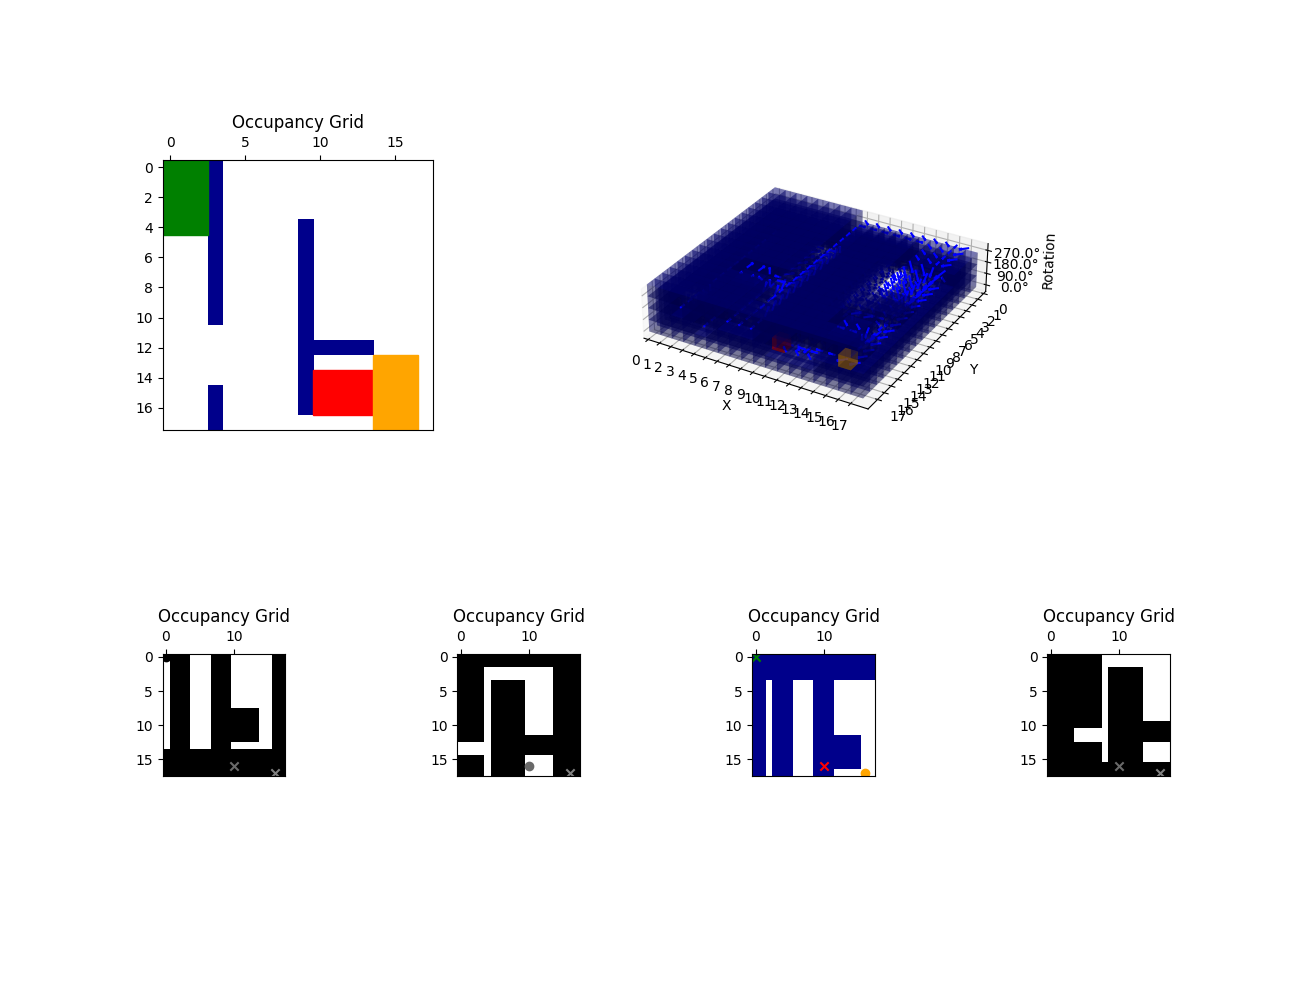

Exception: Local Mininum at x=10, y=16, z=1

Exception: Local Mininum at x=10, y=16, z=1

Exception: Local Mininum at x=10, y=16, z=1

In [456]:
fig = plt.figure(figsize=(13, 10))
ax_occupancy_grid = fig.add_subplot(2, 7, (1,2))
ax_cs_2D = [fig.add_subplot(2, 7, 8), fig.add_subplot(2, 7, 10), fig.add_subplot(2, 7, 12), fig.add_subplot(2, 7, 14)]
ax_cs_3D = fig.add_subplot(2, 7, (3,7), projection='3d')

path = []

visualize_computational_space(
    computational_space=computational_space, 
    force_field_x=force_field_x, 
    force_field_y=force_field_y, 
    force_field_rotation=force_field_rotation, 
    start_point=start_point,
    goal_point=goal_point, 
    current_position=current_position,
    ax=ax_cs_3D)

plot_occupancy_grid(
    occupancy_grid=occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    plot_axis=ax_occupancy_grid
)
for rotation in range(4):
    plot_occupancy_grid(
    occupancy_grid=computational_space[rotation],
    start_point=start_point,
    goal_point=goal_point,
    current_position=current_position,
    plot_axis=ax_cs_2D[rotation],
    active = current_position[2] == rotation
)


def on_key(event):
    global current_position, path
    current_position = gradient_descent(
                        current_position=current_position,
                        force_field_x=force_field_x,
                        force_field_y=force_field_y,
                        force_field_rotation=force_field_rotation,
                        path=path)  
    
    visualize_computational_space(
        computational_space=computational_space, 
        force_field_x=force_field_x, 
        force_field_y=force_field_y, 
        force_field_rotation=force_field_rotation, 
        goal_point=goal_point, 
        start_point=start_point,
        current_position=current_position,
        ax=ax_cs_3D)
    plot_occupancy_grid(
        occupancy_grid=occupancy_grid,
        start_point=start_point,
        goal_point=goal_point,
        current_position=current_position,
        robot_width=robot_width,
        robot_length=robot_length,
        plot_axis=ax_occupancy_grid
    )
    for rotation in range(4):
        
        plot_occupancy_grid(
            occupancy_grid=computational_space[rotation],
            start_point=start_point,
            goal_point=goal_point,
            current_position=current_position,
            plot_axis=ax_cs_2D[rotation],
            active = current_position[2] == rotation
    )

    # path.append(tuple(current_position))
    plt.draw()


# Verbinde die Tasten mit der Funktion on_key
fig.canvas.mpl_connect('key_press_event', on_key)


plt.show()